## Validating no pattern identified for aggregated protein reproducibility

**Input:**  
- Aggregated protein reproducibility ranks
- Protein and mRNA abundance
- Source data for Figure1 and Figure 4

**Output:**
- Figure 5

### Import Packages

In [1]:
import os, datetime
import numpy as np
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

import graphing_utils
import customized_plot 
import standardised_pipeline_utils

In [2]:
get_table_path = lambda fname: os.path.normpath('../tables/' + fname)
get_figure_path = lambda fname: os.path.normpath('../figures/' + fname)
get_data_path = lambda folders, fname: os.path.normpath(os.environ['DATA_PATH']+'/'+'/'.join(folders) +'/'+ fname)

file_sourceData_Figure1 = get_table_path('SourceDataForFigure1.csv')
file_sourceData_Figure5 = get_table_path('SourceDataForFigure5.xlsx')
file_soruceData_Figure4 = get_table_path('SourceDataForFigure4.csv')
file_aggregated_protein_reproducibility = get_data_path(['upadhya_ryan_2022'], 'TableS2.xlsx')
file_gtex_protein_abundance =  get_data_path(['jiang_2020'], 'Table_S2.xlsx')
file_gtex_mRNA_abundance = get_data_path(['jiang_2020'], 'Table_S3.xlsx')

In [3]:
protein_reproducibility = pd.read_excel(file_aggregated_protein_reproducibility, 
                                        sheet_name='B. Protein reproducibility rank', 
                                        usecols=['Unnamed: 0', 'Aggregated Reproducibility Rank']).\
                             rename(columns={'Unnamed: 0': 'Gene symbol'}).set_index('Gene symbol').dropna()
protein_reproducibility[:2]

,Aggregated Reproducibility Rank
Gene symbol,
A1BG,0.575671
A2M,0.501120


In [4]:
antibody_validation_status = pd.read_csv(file_sourceData_Figure1, index_col=0)
print("Dimensions: ", antibody_validation_status.shape)
antibody_validation_status[:2]

Dimensions:  (173, 2)


,GeneName,ValidationStatus
PeptideTarget,,
1433BETA,YWHAB,Valid
1433EPSILON,YWHAE,Use with Caution


In [5]:
gtex_protein_abundance = pd.read_excel(io=file_gtex_protein_abundance, sheet_name="C protein normalized abundance", 
                               skiprows=3, index_col='gene.id', engine='openpyxl')
print("Dimensions: ", gtex_protein_abundance.shape)
gtex_protein_abundance[:2]

Dimensions:  (12627, 533)


,gene.id.full,reference,GTEX-12WSD-0526-SM-9KNJH,GTEX-11DXX-1226-SM-9KI3K,GTEX-12WSD-1326-SM-9KMWZ,GTEX-13D11-0226-SM-9KI5R,GTEX-1211K-0226-SM-9KMWV,GTEX-YEC4-1426-SM-9KI3B,GTEX-12WSD-1426-SM-9KMX4,GTEX-12WSD-2626-SM-9KMX7,...,reference.110,GTEX-13D11-2626-SM-9KNJO.1,GTEX-11GSP-0226-SM-9KI3T.1,GTEX-1211K-1726-SM-9KI5K.1,GTEX-13FTW-0526-SM-9KNJC.1,GTEX-11GSP-2126-SM-9KI3Y.1,GTEX-13FTW-1526-SM-9KNJB.1,GTEX-11GSP-1126-SM-9KMWC.2,GTEX-13OW8-0226-SM-9KI4E.1,reference.111
gene.id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,ENSG00000000003.10,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
ENSG00000000419,ENSG00000000419.8,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


In [6]:
gtex_id_mapper = pd.read_excel(io=file_gtex_protein_abundance, sheet_name='G protein TS score', 
                               skiprows=2, engine='openpyxl', converters={'hgnc_symbol': str})

In [7]:
gtex_protein_abundance.drop(list(gtex_protein_abundance.filter(regex = 'reference')), axis = 1, inplace = True)
gtex_protein_abundance.drop(columns=['gene.id.full'], inplace=True)
gtex_protein_abundance.index = gtex_protein_abundance.index.map(gtex_id_mapper.set_index('ensembl_id')['hgnc_symbol'])

In [8]:
gtex_protein_abundance_processed = standardised_pipeline_utils.process(gtex_protein_abundance)
gtex_protein_abundance_mean = pd.DataFrame(gtex_protein_abundance_processed.mean(axis=1), 
                                                         columns=['protein_Mean_Abundance']).apply(np.log2)
gtex_protein_abundance_mean[:2]

Dimensions:  (4725, 420)


,protein_Mean_Abundance
gene.id,
A1BG,10.406928
A2M,13.363612


In [9]:
gtex_mRNA_abundance = pd.read_excel(io=file_gtex_mRNA_abundance, sheet_name="B RNA tissue median", 
                               skiprows=2, engine='openpyxl', index_col='gene.id')
print("Dimensions: ", gtex_mRNA_abundance.shape)
gtex_mRNA_abundance[:2]

Dimensions:  (12245, 32)


,Adrenal Gland,Artery Aorta,Artery Coronary,Artery Tibial,Brain Cerebellum,Brain Cortex,Breast,Colon Sigmoid,Colon Transverse,GE junction,...,Prostate,Skin Unexpo,Skin SunExpo,Small Intestine,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina
gene.id,,,,,,,,,,,,,,,,,,,,,
ENSG00000188976,5.43,5.61,5.54,5.71,6.03,5.95,5.73,5.67,5.77,5.73,...,5.84,6.39,6.45,5.69,5.78,5.83,6.42,5.70,5.75,5.96
ENSG00000187961,3.29,3.60,3.58,3.16,4.66,4.06,3.48,3.58,3.60,3.69,...,3.99,4.00,4.00,3.76,4.41,3.80,4.77,3.58,3.62,3.99


In [10]:
gtex_id_mapper = pd.read_excel(io=file_gtex_mRNA_abundance, sheet_name='D RNA TS score', 
                               skiprows=3, engine='openpyxl', converters={'hgnc_symbol': str})

In [11]:
gtex_mRNA_abundance.index = gtex_mRNA_abundance.index.map(gtex_id_mapper.set_index('ensembl_id')['hgnc_symbol'])
print("Dimensions: ", gtex_mRNA_abundance.shape)
gtex_mRNA_abundance[:2]

Dimensions:  (12245, 32)


,Adrenal Gland,Artery Aorta,Artery Coronary,Artery Tibial,Brain Cerebellum,Brain Cortex,Breast,Colon Sigmoid,Colon Transverse,GE junction,...,Prostate,Skin Unexpo,Skin SunExpo,Small Intestine,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina
gene.id,,,,,,,,,,,,,,,,,,,,,
NOC2L,5.43,5.61,5.54,5.71,6.03,5.95,5.73,5.67,5.77,5.73,...,5.84,6.39,6.45,5.69,5.78,5.83,6.42,5.70,5.75,5.96
KLHL17,3.29,3.60,3.58,3.16,4.66,4.06,3.48,3.58,3.60,3.69,...,3.99,4.00,4.00,3.76,4.41,3.80,4.77,3.58,3.62,3.99


In [12]:
gtex_mRNA_abundance.replace("NA;", np.nan, regex=True, inplace=True)
gtex_mRNA_abundance[:2]

,Adrenal Gland,Artery Aorta,Artery Coronary,Artery Tibial,Brain Cerebellum,Brain Cortex,Breast,Colon Sigmoid,Colon Transverse,GE junction,...,Prostate,Skin Unexpo,Skin SunExpo,Small Intestine,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina
gene.id,,,,,,,,,,,,,,,,,,,,,
NOC2L,5.43,5.61,5.54,5.71,6.03,5.95,5.73,5.67,5.77,5.73,...,5.84,6.39,6.45,5.69,5.78,5.83,6.42,5.70,5.75,5.96
KLHL17,3.29,3.60,3.58,3.16,4.66,4.06,3.48,3.58,3.60,3.69,...,3.99,4.00,4.00,3.76,4.41,3.80,4.77,3.58,3.62,3.99


In [13]:
gtex_mRNA_abundance_processed = standardised_pipeline_utils.process(gtex_mRNA_abundance)
gtex_mRNA_abundance_mean = pd.DataFrame(gtex_mRNA_abundance_processed.mean(axis=1), 
                                                         columns=['mRNA_Mean_Abundance']).apply(np.log2)
gtex_mRNA_abundance_mean[:5]

Dimensions:  (12226, 32)


,mRNA_Mean_Abundance
gene.id,
A1BG,0.946029
A1CF,NaN
A2M,3.025970
A2ML1,NaN
A4GALT,2.196135


In [14]:
tcga_ab_status_properties = pd.concat([protein_reproducibility, gtex_mRNA_abundance_mean, 
                                  gtex_protein_abundance_mean, antibody_validation_status.set_index('GeneName')], 
                                 axis=1)
tcga_ab_status_properties.dropna(subset=['ValidationStatus'], inplace=True)
print("Dimensions: ", tcga_ab_status_properties.shape)
tcga_ab_status_properties[:2]

Dimensions:  (173, 4)


,Aggregated Reproducibility Rank,mRNA_Mean_Abundance,protein_Mean_Abundance,ValidationStatus
ADAR,0.849699,2.658497,11.479885,Valid
ANXA1,0.916790,2.645010,12.200649,Valid


In [15]:
ccle_validation_status = pd.read_csv(file_soruceData_Figure4, index_col = 0, usecols=['Unnamed: 0', 'ValidationStatus'])
print("Dimensions: ", ccle_validation_status.shape)
ccle_validation_status[:2]

Dimensions:  (123, 1)


,ValidationStatus
ACACA,Use with Caution
ACTB,Use with Caution


In [16]:
ccle_ab_status_properties = pd.concat([protein_reproducibility, gtex_mRNA_abundance_mean, 
                                       gtex_protein_abundance_mean, ccle_validation_status],
                                      axis=1)
ccle_ab_status_properties.dropna(subset=['ValidationStatus'], inplace=True)
print("Dimensions: ", ccle_ab_status_properties.shape)
ccle_ab_status_properties[:2]

Dimensions:  (123, 4)


,Aggregated Reproducibility Rank,mRNA_Mean_Abundance,protein_Mean_Abundance,ValidationStatus
ACACA,0.453268,NaN,9.470895,Use with Caution
ACTB,0.629004,3.519282,NaN,Use with Caution


In [17]:
palette = [graphing_utils.get_color(color) for color in ['orange', 'green']]
xlab1 = 'TCGA antibody validation status'; ylab1 = "Aggregated protein\nreproducibility rank"; 
xlab2 = 'CCLE antibody validation status'; ylab2 = "Protein mean abundance\n(log transformed)"
ylab3 = "mRNA mean abundance\n(log transformed)"
args = [graphing_utils.additional_plot_parameters(xlab=xlab1, ylab=ylab1, title = None, palette = palette, 
                                                ylim = (0, 1.1)),
        graphing_utils.additional_plot_parameters(xlab=xlab1, ylab=ylab2, title = None, palette = palette, 
                                                ylim = (6.5, 17.5)),
        graphing_utils.additional_plot_parameters(xlab=xlab1, ylab=ylab3, title = None, palette = palette, 
                                                ylim = (-2, 4)),
        graphing_utils.additional_plot_parameters(xlab=xlab2, ylab=ylab1, title = None, palette = palette, 
                                                ylim = (0, 1.1)),
        graphing_utils.additional_plot_parameters(xlab=xlab2, ylab=ylab2, title = None, palette = palette, 
                                                ylim = (6.5, 17.5)),
        graphing_utils.additional_plot_parameters(xlab=xlab2, ylab=ylab3, title = None, palette = palette, 
                                                ylim = (-2, 4))]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Use with Caution v.s. Valid: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.936e-01 U_stat=1.100e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Use with Caution v.s. Valid: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.386e-01 U_stat=8.340e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Use with Caution v.s. Valid: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.867e-01 U_stat=2.255e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 

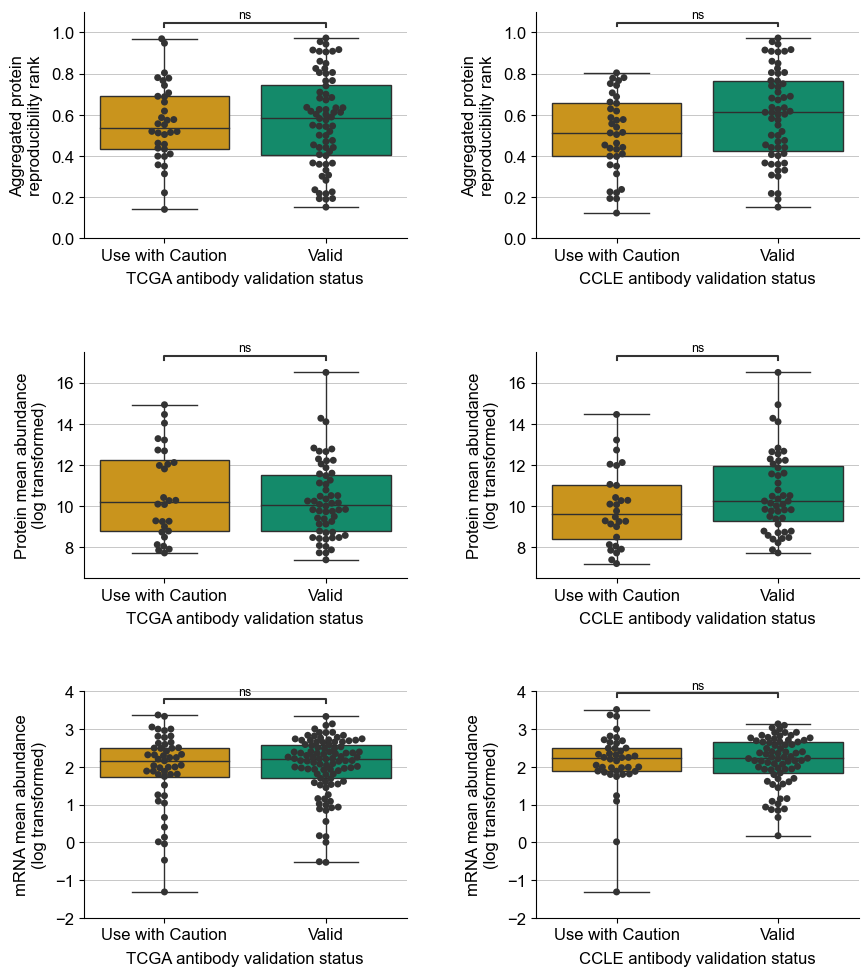

In [18]:
order=['Use with Caution', 'Valid']
with plt.rc_context({'axes.linewidth': 0.8, 'axes.labelsize':12, 'axes.spines.left': True, 'xtick.labelsize':12, 
                     'ytick.labelsize':12}):
    figure, ax = plt.subplots(3, 2, figsize=(10,12))
    customized_plot.draw_swarmBoxPlot(tcga_ab_status_properties, 'Aggregated Reproducibility Rank', 
                                      ax[0, 0], args[0], order)
    customized_plot.draw_swarmBoxPlot(tcga_ab_status_properties, 'protein_Mean_Abundance', 
                                      ax[1, 0], args[1], order)
    customized_plot.draw_swarmBoxPlot(tcga_ab_status_properties, 'mRNA_Mean_Abundance', 
                                      ax[2, 0], args[2], order)
    customized_plot.draw_swarmBoxPlot(ccle_ab_status_properties, 'Aggregated Reproducibility Rank', 
                                      ax[0, 1], args[3], order)
    customized_plot.draw_swarmBoxPlot(ccle_ab_status_properties, 'protein_Mean_Abundance', 
                                      ax[1, 1], args[4], order)
    customized_plot.draw_swarmBoxPlot(ccle_ab_status_properties, 'mRNA_Mean_Abundance', 
                                      ax[2, 1], args[5], order)
    plt.subplots_adjust(wspace=0.4, hspace=0.5)
    figure.savefig(get_figure_path('Figure5.svg'), bbox_inches='tight', dpi=300)

<div class="alert alert-block alert-success">
    Proteins measured using good and bad antibodies do not have differing measurement reproducibility, protein or mRNA abundances.
</div>

In [19]:
writer = pd.ExcelWriter(file_sourceData_Figure5)
tcga_ab_status_properties.to_excel(writer,'A. TCGA Antibodies')
ccle_ab_status_properties.to_excel(writer, 'B. CCLE Antibodies')
writer.save()